In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch_geometric
!pip install pymatreader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


# Marging Target column from ClinicalData

In [3]:
import pandas as pd
import numpy as np

kinz_df= pd.read_csv("/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/kinz-ACC-data_panda_revisedData_10.03.2024.csv.2024")

clinic_df = pd.read_csv("/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/ClinicalData80.csv")

In [ ]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []

class_col = "TotalFFIScore"



for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub][class_col]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)




new_target_name = "frailty_class"

df = pd.DataFrame(kinz_np, columns=kinz_df.columns.to_list()+[new_target_name])


100%|██████████| 82942/82942 [00:48<00:00, 1726.09it/s]


In [ ]:
df[new_target_name].value_counts()

,count
frailty_class,
1.0,32258
0.0,20282
2.0,15409
3.0,9846
nan,2926
4.0,2221


In [ ]:
replace_values = {0.0:0 ,1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}

In [ ]:
df[new_target_name] = df[new_target_name].replace(replace_values)

In [ ]:
df[new_target_name].value_counts()

,count
frailty_class,
1,59734
0,20282
nan,2926


In [ ]:
df

,patient_id,trial,walking_speed,t_uniform,ACC_1,ACC_2,ACC_3,ACC_4,ACC_5,ACC_6,...,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,left_foot_swing,pelvis_pos,right_foot_swing,frailty_class
0,001-LO,Trial1,Regular,0.014806,0.00002,0.000009,0.0,0.0,0.000003,0.000009,...,455.851148,-429.608188,968.354628,546.261617,-460.863141,981.439603,229.423731,0.0,-126.667489,1
1,001-LO,Trial1,Regular,0.034787,0.000004,0.000009,0.000001,0.000001,0.000008,0.000002,...,447.281911,-409.451975,991.238931,537.86864,-437.048488,1044.996519,317.214018,15.991805,-183.335114,1
2,001-LO,Trial1,Regular,0.054767,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,449.741414,-408.880941,1023.415136,542.683131,-443.993156,1073.302525,333.898894,58.530474,-230.894481,1
3,001-LO,Trial1,Regular,0.074748,0.0,0.0,0.0,0.0,0.0,0.0,...,455.991663,-415.800078,1059.598333,546.968971,-453.972524,1098.709654,334.847164,94.281263,-241.0803,1
4,001-LO,Trial1,Regular,0.094728,0.0,0.0,0.0,0.0,0.0,0.0,...,465.517432,-429.191348,1099.243905,550.798012,-466.574126,1121.611912,322.197695,125.323131,-218.972258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,080-TW,Trial4,Fast,6.710077,0.0,0.0,0.0,0.0,0.0,0.0,...,-128.075847,-883.773049,760.482948,-114.463719,-768.319871,787.098138,237.94485,7382.702729,228.121957,nan
82938,080-TW,Trial4,Fast,6.730058,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.287154,-865.129861,755.543358,-116.846866,-754.719604,785.451411,243.559551,7390.640199,240.6952,nan
82939,080-TW,Trial4,Fast,6.750038,0.0,0.0,0.0,0.0,0.0,0.0,...,-132.49846,-846.486674,750.603769,-119.230014,-741.119337,783.804684,249.174253,7398.57767,253.268442,nan
82940,080-TW,Trial4,Fast,6.770019,0.0,0.0,0.0,0.0,0.0,0.0,...,-134.570185,-828.952052,745.726696,-121.395593,-728.193348,781.801935,254.621141,7405.807611,265.228182,nan


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Separate the data by frailty_class
class_0 = df[df[new_target_name] == 1.0]
class_1 = df[df[new_target_name] == 0.0]

# Group by 'patientID' and sample patients
class_0_patient_ids = class_0['patient_id'].unique()
class_1_patient_ids = class_1['patient_id'].unique()

# Determine the number of patients to sample
num_patients = min(len(class_0_patient_ids), len(class_1_patient_ids))

# Sample patients
sampled_class_0_patient_ids = class_0_patient_ids[:num_patients]
sampled_class_1_patient_ids = class_1_patient_ids[:num_patients]

# Filter the data to only include the sampled patients
sampled_class_0 = class_0[class_0['patient_id'].isin(sampled_class_0_patient_ids)]
sampled_class_1 = class_1[class_1['patient_id'].isin(sampled_class_1_patient_ids)]

# Combine the balanced classes
balanced_df = pd.concat([sampled_class_0, sampled_class_1])

# Shuffle the DataFrame to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of patients in class 0: {len(sampled_class_0_patient_ids)}")
print(f"Number of patients in class 1: {len(sampled_class_1_patient_ids)}")

Number of patients in class 0: 21
Number of patients in class 1: 21


In [ ]:
final_data_saving_path = '/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_Balanced_ACC.csv'


balanced_df.to_csv(final_data_saving_path, index=False)

# MAIN

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import torch
import plotly.graph_objs as go
from torch_geometric.data import Data
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import DataLoader, Dataset, Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve


# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()


# Custom Dataset Class
class SkeletonDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file
        self.num_nodes = len(joints)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Extract node features including timestamp, accel_energy_total, footfall_event_times
        node_features = []
        for joint in joints:
            x = row[f'{joint}_X']
            y = row[f'{joint}_Y']
            z = row[f'{joint}_Z']
            timestamp = row['t_uniform']  # Include timestamp
            accel_energy_total = row['accel_energy_total']  # Include accel_energy_total
            footfall_event_times = row['footfall_event_times']  # Include footfall_event_times
            node_features.append([x, y, z, timestamp, accel_energy_total, footfall_event_times])

        x = torch.tensor(node_features, dtype=torch.float)  # Shape: [num_nodes, 6]

        # Label
        y = torch.tensor(row['frailty_class'], dtype=torch.float)

        # Create data object
        data = Data(x=x, edge_index=edge_index, y=y)

        return data


class HybridSTGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(HybridSTGCN, self).__init__()

        # Spatial Graph Convolution Layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Temporal Convolution Layers
        self.temporal_conv1 = nn.Conv1d(in_channels=hidden_channels,
                                        out_channels=hidden_channels,
                                        kernel_size=3, padding=1)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        batch = getattr(data, 'batch', None)  # Use batch if available, else None

        # Spatial GCN Layers
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))  # x: [num_nodes*batch_size, hidden_channels]

        # Reshape for Temporal Conv
        if batch is not None:
            batch_size = batch.max().item() + 1
            num_nodes = x.size(0) // batch_size
        else:
            batch_size = 1
            num_nodes = x.size(0)

        x = x.view(batch_size, num_nodes, -1)  # [batch_size, num_nodes, hidden_channels]
        x = x.permute(0, 2, 1)  # [batch_size, hidden_channels, num_nodes]

        # Temporal Conv Layer
        x = F.relu(self.temporal_conv1(x))  # [batch_size, hidden_channels, num_nodes]

        # LSTM for capturing temporal patterns
        x = x.permute(0, 2, 1)  # [batch_size, num_nodes, hidden_channels]
        x, _ = self.lstm(x)  # [batch_size, num_nodes, hidden_channels]

        # Pooling over nodes
        x = x.mean(dim=1)  # [batch_size, hidden_channels]

        # Fully Connected Layer
        x = self.fc(x)  # [batch_size, num_classes]
        x = torch.sigmoid(x)  # For binary classification

        return x.squeeze()  # [batch_size]


# Data preparation
data_path = '/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_Balanced_ACC.csv'
dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]

# Load dataset
dataset = SkeletonDataset(csv_file=dataframe[dataframe['walking_speed'] == "Fast"])

# Split into training and testing datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = HybridSTGCN(in_channels=6, hidden_channels=128, num_classes=1).to(device)  # Adjust in_channels to 6

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)



# Training Function
def train(epoch):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # [batch_size]
        y = data.y.to(device).float()  # [batch_size]

        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        preds = (out >= 0.5).float()
        correct += (preds == y).sum().item()
        total += data.num_graphs

    avg_loss = total_loss / len(train_loader.dataset)
    accuracy = correct / total
    print(f'Epoch {epoch}, Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.4f}')
    return avg_loss, accuracy




# Evaluation Function
def evaluate(loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data).view(-1)  # Ensure the output is of shape [batch_size]
            y = data.y.to(device).float().view(-1)  # Ensure target is of shape [batch_size]
            preds = (out >= 0.5).float()

            total_loss += criterion(out, y.float()).item() * data.num_graphs
            correct += (preds == y).sum().item()
            total += data.num_graphs
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy, all_preds, all_labels










class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = float('inf')
        self.counter = 0
        self.best_model = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            if self.restore_best_weights:
                self.best_model = model.state_dict()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                if self.restore_best_weights and self.best_model is not None:
                    model.load_state_dict(self.best_model)
                return True
        return False






# Initialize EarlyStopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01, restore_best_weights=True)

# Training Loop with Early Stopping
num_epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    # Train the model and get training loss and accuracy
    train_loss, train_acc = train(epoch)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluate the model on the test set and get test loss and accuracy
    test_loss, test_acc, all_preds, all_labels = evaluate(test_loader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Epoch {epoch}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

    # Check for early stopping
    if early_stopping(test_loss, model):
        print("Early stopping triggered.")
        break

# Final Evaluation Metrics
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).ravel()
specificity = tn / (tn + fp)

print(f'Final Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')






model_save_path = '/content/drive/MyDrive/Iqram Sir/KINZ_Model/hybrid_stgcn_model_acc.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


cpu
Epoch 1, Train Loss: 0.6412, Train Accuracy: 0.6070
Epoch 1, Test Loss: 0.6068, Test Accuracy: 0.6312
Epoch 2, Train Loss: 0.5879, Train Accuracy: 0.6506
Epoch 2, Test Loss: 0.5584, Test Accuracy: 0.6900
Epoch 3, Train Loss: 0.5355, Train Accuracy: 0.7236
Epoch 3, Test Loss: 0.5304, Test Accuracy: 0.7118
Epoch 4, Train Loss: 0.4968, Train Accuracy: 0.7508
Epoch 4, Test Loss: 0.4702, Test Accuracy: 0.7625
Epoch 5, Train Loss: 0.4654, Train Accuracy: 0.7649
Epoch 5, Test Loss: 0.4372, Test Accuracy: 0.7913
Epoch 6, Train Loss: 0.4395, Train Accuracy: 0.7875
Epoch 6, Test Loss: 0.4156, Test Accuracy: 0.8031
Epoch 7, Train Loss: 0.4169, Train Accuracy: 0.7999
Epoch 7, Test Loss: 0.3924, Test Accuracy: 0.8169
Epoch 8, Train Loss: 0.3935, Train Accuracy: 0.8134
Epoch 8, Test Loss: 0.3655, Test Accuracy: 0.8368
Epoch 9, Train Loss: 0.3678, Train Accuracy: 0.8334
Epoch 9, Test Loss: 0.3890, Test Accuracy: 0.8028
Epoch 10, Train Loss: 0.3452, Train Accuracy: 0.8454
Epoch 10, Test Loss: 0.34

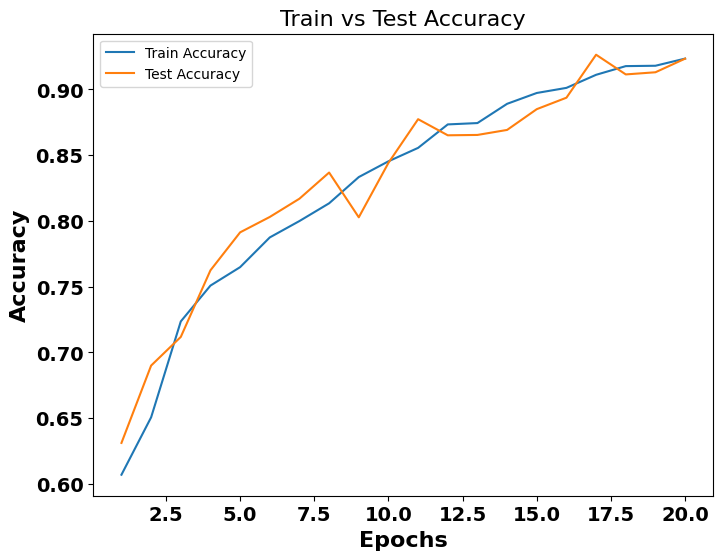

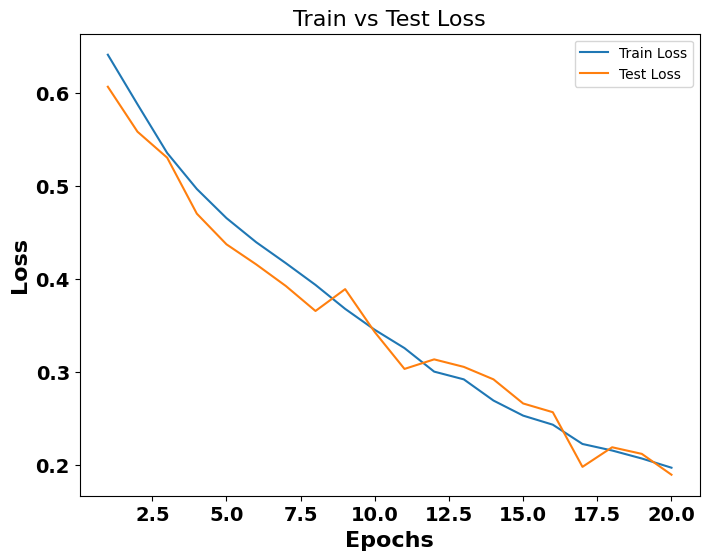

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, len(train_accuracies) + 1)

# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.title('Train vs Test Accuracy', fontsize=16)
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 6))  # Ensure the same size as the accuracy plot
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Loss', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.title('Train vs Test Loss', fontsize=16)
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objs as go

# Function to plot the joints and connections in 3D
def plot_patient_skeleton_3d(patient_data, joints, edges, title="3D Skeleton Plot"):
    # Extract joint coordinates (X, Y, Z)
    joint_positions = []
    for joint in joints:
        x = patient_data[f'{joint}_X']
        y = patient_data[f'{joint}_Y']
        z = patient_data[f'{joint}_Z']
        joint_positions.append([x, y, z])

    joint_positions = np.array(joint_positions)  # Shape: [num_joints, 3]

    # Create scatter plot for the joints
    scatter = go.Scatter3d(
        x=joint_positions[:, 0],  # X-coordinates
        y=joint_positions[:, 1],  # Y-coordinates
        z=joint_positions[:, 2],  # Z-coordinates
        mode='markers+text',
        text=joints,  # Label each joint
        marker=dict(
            size=6,
            color='blue',
            opacity=0.8
        )
    )

    # Create lines for the bones (edges between joints)
    edge_x, edge_y, edge_z = [], [], []
    for src, dst in edges:
        src_idx = joint_to_idx[src]
        dst_idx = joint_to_idx[dst]
        edge_x += [joint_positions[src_idx, 0], joint_positions[dst_idx, 0], None]  # X-coordinates for the edge
        edge_y += [joint_positions[src_idx, 1], joint_positions[dst_idx, 1], None]  # Y-coordinates for the edge
        edge_z += [joint_positions[src_idx, 2], joint_positions[dst_idx, 2], None]  # Z-coordinates for the edge

    lines = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='black', width=4),
        hoverinfo='none'
    )

    # Combine scatter plot and lines into a single figure
    fig = go.Figure(data=[scatter, lines])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='cube'
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )

    # Show the figure
    fig.show()


# Example: Select a specific row from your dataset (for example, the first patient frame)
patient_row = dataframe.iloc[0]

# Plot the skeleton for this single patient frame
plot_patient_skeleton_3d(patient_row, joints, edges, title="3D Skeleton Plot for Patient Frame")


# GRAD CAM

In [ ]:
import torch
import pandas as pd
from scipy import stats  # For calculating the mode



import torch
import pandas as pd
from scipy import stats  # For calculating the mode
from tqdm.notebook import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader, Dataset, Data
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np





import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import torch
import plotly.graph_objs as go
from torch_geometric.data import Data
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import DataLoader, Dataset, Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve


# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()


# Custom Dataset Class
class SkeletonDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file
        self.num_nodes = len(joints)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Extract node features including timestamp, accel_energy_total, footfall_event_times
        node_features = []
        for joint in joints:
            x = row[f'{joint}_X']
            y = row[f'{joint}_Y']
            z = row[f'{joint}_Z']
            timestamp = row['t_uniform']  # Include timestamp
            accel_energy_total = row['accel_energy_total']  # Include accel_energy_total
            footfall_event_times = row['footfall_event_times']  # Include footfall_event_times
            node_features.append([x, y, z, timestamp, accel_energy_total, footfall_event_times])

        x = torch.tensor(node_features, dtype=torch.float)  # Shape: [num_nodes, 6]

        # Label
        y = torch.tensor(row['frailty_class'], dtype=torch.float)

        # Create data object
        data = Data(x=x, edge_index=edge_index, y=y)

        return data


class HybridSTGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(HybridSTGCN, self).__init__()

        # Spatial Graph Convolution Layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Temporal Convolution Layers
        self.temporal_conv1 = nn.Conv1d(in_channels=hidden_channels,
                                        out_channels=hidden_channels,
                                        kernel_size=3, padding=1)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        batch = getattr(data, 'batch', None)  # Use batch if available, else None

        # Spatial GCN Layers
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))  # x: [num_nodes*batch_size, hidden_channels]

        # Reshape for Temporal Conv
        if batch is not None:
            batch_size = batch.max().item() + 1
            num_nodes = x.size(0) // batch_size
        else:
            batch_size = 1
            num_nodes = x.size(0)

        x = x.view(batch_size, num_nodes, -1)  # [batch_size, num_nodes, hidden_channels]
        x = x.permute(0, 2, 1)  # [batch_size, hidden_channels, num_nodes]

        # Temporal Conv Layer
        x = F.relu(self.temporal_conv1(x))  # [batch_size, hidden_channels, num_nodes]

        # LSTM for capturing temporal patterns
        x = x.permute(0, 2, 1)  # [batch_size, num_nodes, hidden_channels]
        x, _ = self.lstm(x)  # [batch_size, num_nodes, hidden_channels]

        # Pooling over nodes
        x = x.mean(dim=1)  # [batch_size, hidden_channels]

        # Fully Connected Layer
        x = self.fc(x)  # [batch_size, num_classes]
        x = torch.sigmoid(x)  # For binary classification

        return x.squeeze()  # [batch_size]


# Data preparation
data_path = '/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_Balanced_ACC.csv'
dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]

# Load the saved model
model_save_path = '/content/drive/MyDrive/Iqram Sir/KINZ_Model/hybrid_stgcn_model_acc.pth'




device = torch.device('cpu')

# Load the saved model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = HybridSTGCN(in_channels=6, hidden_channels=128, num_classes=1).to(device)
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set model to evaluation mode


<ipython-input-30-e5ecddf2b7a1>:178: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



HybridSTGCN(
  (gcn1): GCNConv(6, 128)
  (gcn2): GCNConv(128, 128)
  (temporal_conv1): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (lstm): LSTM(128, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
import torch
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class GradCAM_GNN:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        # Register forward and backward hooks on the target layer
        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_backward_hook(backward_hook))

    def generate_cam(self, data):
        self.model.eval()

        # Forward pass on the single sample
        output = self.model(data)

        # Backward pass to compute gradients
        self.model.zero_grad()
        output.backward()

        # Generate the CAM by multiplying the activations with the gradients
        cam = self.gradients * self.activations  # Shape: [hidden_channels, num_nodes]

        # Average across the channels (feature maps) to get the final CAM per node
        node_cam = cam.mean(dim=0)  # Shape: [num_nodes]

        # Normalize the node CAM to [0, 1]
        node_cam = node_cam - node_cam.min()
        node_cam = node_cam / node_cam.max()

        # Calculate edge importance by averaging the CAM values of the connected nodes
        edge_index = data.edge_index.cpu().numpy()
        edge_cam = []
        for i in range(edge_index.shape[1]):
            src, dst = edge_index[:, i]
            edge_imp = (node_cam[src] + node_cam[dst]) / 2.0  # Averaging node CAMs for the edge
            edge_cam.append(edge_imp.item())

        edge_cam = np.array(edge_cam)

        return node_cam.detach().cpu().numpy(), edge_cam

    def remove_hooks(self):
        for handle in self.hook_handles:
            handle.remove()

# Visualization function for a single sample in 3D using Plotly with color scale
def visualize_human_skeleton_3d_plotly(cam, data, title="3D Grad-CAM Visualization"):
    node_cam, edge_cam = cam
    node_positions = data.x[:, :3].cpu().numpy()  # Assume first 3 columns are X, Y, Z

    # Create a scatter plot for the joints
    scatter = go.Scatter3d(
        x=node_positions[:, 0],
        y=node_positions[:, 1],
        z=node_positions[:, 2],
        mode='markers+text',
        text=[f'{i}' for i in range(node_positions.shape[0])],
        marker=dict(
            size=8,
            color=node_cam,
            colorscale='Viridis',
            colorbar=dict(title="Node Grad-CAM Value", x=0.9),  # Add color bar for node Grad-CAM values
            opacity=0.8
        )
    )

    # Create lines for the edges (bones)
    edge_index = data.edge_index.cpu().numpy()
    edge_x = []
    edge_y = []
    edge_z = []
    edge_colors = []
    for i in range(edge_index.shape[1]):
        src, dst = edge_index[:, i]
        edge_x.extend([node_positions[src, 0], node_positions[dst, 0], None])
        edge_y.extend([node_positions[src, 1], node_positions[dst, 1], None])
        edge_z.extend([node_positions[src, 2], node_positions[dst, 2], None])
        edge_colors.extend([edge_cam[i], edge_cam[i], edge_cam[i]])  # Use the edge importance for coloring

    # Ensure that there are no None values in edge_colors
    edge_colors = np.array(edge_colors)
    edge_colors = np.nan_to_num(edge_colors, nan=0.0)  # Replace None or NaN with 0.0

    lines = go.Scatter3d(
        x=edge_x,
        y=edge_y,
        z=edge_z,
        mode='lines',
        line=dict(
            color=edge_colors,
            colorscale='Viridis',
            width=4,
            colorbar=dict(title="Edge Grad-CAM Value", x=1.05)  # Position the edge color bar separately
        ),
        hoverinfo='none'
    )

    # Combine the scatter plot and lines into a single figure
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    fig.add_trace(scatter)
    fig.add_trace(lines)

    # Set the layout for better visualization, remove background and ticks
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X', showgrid=False, backgroundcolor="white", showticklabels=False),
            yaxis=dict(title='Y', showgrid=False, backgroundcolor="white", showticklabels=False),
            zaxis=dict(title='Z', showgrid=False, backgroundcolor="white", showticklabels=False),
            aspectmode='cube',
            bgcolor="white"  # Set overall scene background color to white
        ),
        margin=dict(l=0, r=0, b=0, t=0),
        paper_bgcolor="white",  # Set the background color of the figure
        plot_bgcolor="white",  # Set the background color of the plot area
        title=title,
        showlegend=False
    )

    fig.show()




In [ ]:
# Specify the patient ID you want to visualize
patient_id = '047-MW'  # Replace with actual patient ID
# Filter the dataset for the specific patient
patient_data = dataframe[dataframe['patient_id'] == patient_id]  # Assuming dataframe has 'patientID' column
patient_dataset = SkeletonDataset(patient_data)

# Create a DataLoader for the specific patient
patient_loader = DataLoader(patient_dataset, batch_size=1, shuffle=False)  # Batch size 1 to load one sample at a time

target_layer = model.gcn2 # Example target layer
grad_cam = GradCAM_GNN(model, target_layer)

# Specify which data points you want to plot
points_to_plot = [80]  # Change this list to include the desired data points

# Loop through the DataLoader and select the specified data points
for i, single_sample in enumerate(patient_loader, 1):  # Start index from 1
    if i in points_to_plot:
        print(f"Visualizing {i}-th data point for patient {patient_id}... and Layer {target_layer}")

        single_sample = single_sample.to(device)

        # Generate and visualize the CAM for this single patient sample
        cam = grad_cam.generate_cam(single_sample)
        visualize_human_skeleton_3d_plotly(cam, single_sample, title=f"Grad-CAM for Patient {patient_id}, Data Point {i}")

# Remove the hooks to clean up
grad_cam.remove_hooks()

Visualizing 80-th data point for patient 047-MW... and Layer GCNConv(128, 128)


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning:

'data.DataLoader' is deprecated, use 'loader.DataLoader' instead

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1640: FutureWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.

